In [2]:
%matplotlib inline

import numpy as np # NUMPY
import pandas as pd # PANDAS
import matplotlib.pyplot as plt # MATPLOTLIB
import seaborn as sns # SEABORN
import scipy
import sklearn
from sklearn.decomposition import PCA
import cv2
import os 
from skimage import filters
from scipy import ndimage

# Vamos a escribir un expression map, primero con us Self Organizing Map

In [3]:
b_shape = pd.read_csv('pca_shapepoints.csv',header = None)
b_structure = pd.read_csv('pca_structurepoints.csv',header = None)
b_cartoon = pd.read_csv('pca_cartoonpoints.csv',header = None)
b_texture = pd.read_csv('pca_texturepoints.csv',header = None)

In [4]:
cant_frames_per_seq = pd.read_csv('ckmock_landmark_FramePerSeq.csv',header = None)
cant_frames_per_seq = np.asarray(cant_frames_per_seq).flatten()
cant_frames_per_seq

first_frames = [0]
for i in cant_frames_per_seq:
    current = first_frames[-1] + i
    first_frames.append(current)

In [5]:
first_frames[0:9]

[0, 16, 38, 52, 73, 93, 106, 125, 141]

In [6]:
b_shape = b_shape[0:154]
b_structure = b_structure[0:154]

In [7]:
b_vector = np.concatenate((b_shape, b_structure), axis = 1)
b_vector = np.concatenate((b_vector, b_cartoon), axis = 1)
b_vector = np.concatenate((b_vector, b_texture), axis = 1)

In [8]:
 b_vector.shape

(154, 86)

In [9]:
emotion_targets = np.zeros(154, dtype=int)
emotion_targets[0] = 0
emotion_targets[1:16] = 6
emotion_targets[16] = 0
emotion_targets[17:38] = 5
emotion_targets[38] = 0
emotion_targets[39:52] = 3
emotion_targets[52] = 0
emotion_targets[53:73] = 1
emotion_targets[73] = 0
emotion_targets[74:93] = 2
emotion_targets[93] = 0
emotion_targets[94:106] = 4
emotion_targets[106] = 0
emotion_targets[107:125] = 6
emotion_targets[125] = 0
emotion_targets[126:141] = 5
emotion_targets[141] = 0
emotion_targets[142:154] = 2


In [10]:

emotion_targets = emotion_targets.reshape((154,1))

In [11]:
#b_vector = np.concatenate((b_vector, emotion_targets), axis = 1)
#b_vector.shape

In [12]:
target = emotion_targets
label_names ={0: 'Neutral',1:'Anger',2:'Disgust',3:'Fear',4:'Happy',5:'Sadness',6:'Surprise'}

In [13]:
target = target.flatten()
target

array([0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
import minisom
### Initialization and training ###
som = minisom.MiniSom(8,8,86,sigma=1.5,learning_rate=0.5)#hay 8x8 neuronas(64)
som.random_weights_init(b_vector)
print("Training...")
som.train_random(b_vector,1000) # training with 100 iterations
print("\n...ready!")

Training...

...ready!


In [15]:
som.topographic_error(b_vector[:100])



0.0

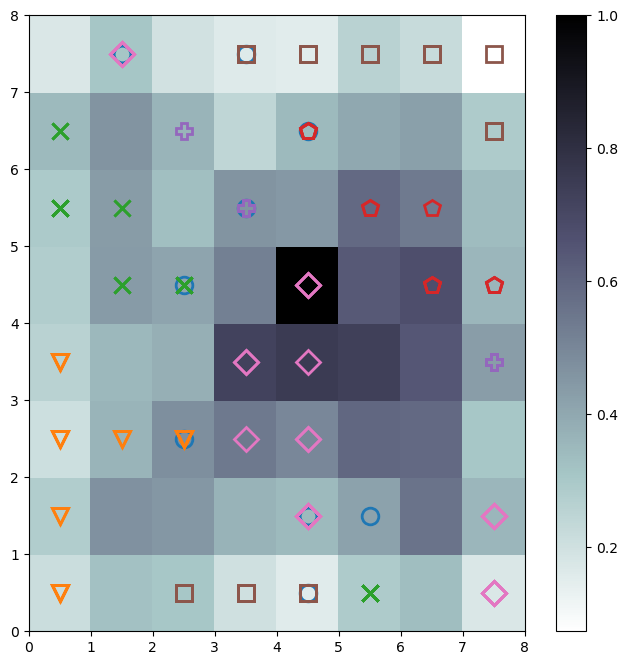

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 8))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

## Plotting the response for each pattern in the iris dataset
## different colors and markers for each label
markers = ['o','v', 'x', 'p', 'P','s','D' ]
colors = ['C0', 'C1', 'C2', 'C3', 'C4','C5', 'C6']
for cnt, xx in enumerate(b_vector):     
    w = som.winner(xx)  # getting the winner  
  
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)

plt.show()

In [ ]:
dic = som.win_map(b_vector,return_indices=True )
emotion_targets = emotion_targets.flatten()


counters = []
for key in dic:
    space = np.zeros(len(dic[key]), dtype = int)
    for i in range(0, len(dic[key])):
        val = dic[key]       
        space[i] = emotion_targets[val[i]]
    counters.append(space)

MyDic = {}

for cnt, key in enumerate(dic):
    MyDic[key] = max(counters[cnt])
    

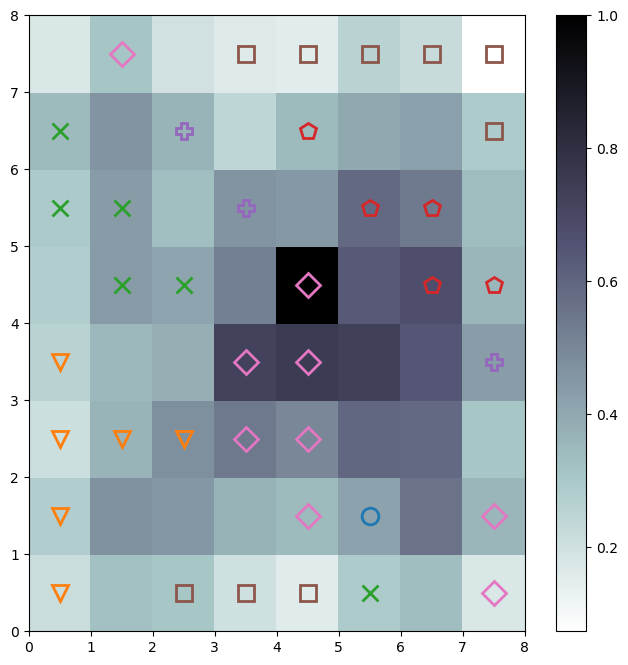

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 8))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

## Plotting the response for each pattern in the iris dataset
## different colors and markers for each label
markers = ['o','v', 'x', 'p', 'P','s','D' ]
colors = ['C0', 'C1', 'C2', 'C3', 'C4','C5', 'C6']

for key in MyDic:
    # palce a marker on the winning position for the sample xx
    w = key    
    plt.plot(w[0]+.5, w[1]+.5, markers[MyDic[key]], markerfacecolor='None',
             markeredgecolor=colors[MyDic[key]], markersize=12, markeredgewidth=2)

plt.show()
#b_tuple = tuple(map(tuple, b_vector))



#som.labels_map(b_vector, emotion_targets.flatten())

In [79]:

MyDic

{(1, 7): 6,
 (7, 0): 6,
 (7, 1): 6,
 (3, 7): 5,
 (4, 7): 5,
 (5, 7): 5,
 (6, 7): 5,
 (7, 7): 5,
 (7, 6): 5,
 (4, 6): 3,
 (5, 5): 3,
 (6, 5): 3,
 (6, 4): 3,
 (7, 4): 3,
 (2, 2): 1,
 (1, 2): 1,
 (0, 3): 1,
 (0, 2): 1,
 (0, 1): 1,
 (0, 0): 1,
 (2, 4): 2,
 (1, 4): 2,
 (1, 5): 2,
 (0, 6): 2,
 (0, 5): 2,
 (3, 5): 4,
 (2, 6): 4,
 (7, 3): 4,
 (4, 1): 6,
 (4, 2): 6,
 (3, 2): 6,
 (3, 3): 6,
 (4, 3): 6,
 (4, 4): 6,
 (4, 0): 5,
 (3, 0): 5,
 (2, 0): 5,
 (5, 1): 0,
 (5, 0): 2}

In [146]:
som.get_weights().shape # las weights finales son los patterns



(8, 8, 86)

In [87]:
np.save('expmaptest.npy', som.get_weights(), allow_pickle=False)

np.save('expmaplabels.npy', MyDic)

In [ ]:
surprise
sadness
fear
anger
disgust
happiness
surprise
sadness
disgust

In [ ]:
markers = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise'] 

In [139]:
According to ck+

Anger = 1
Contempt = 2 (no vemos)
Disgust = 3
Fear = 4
Happy = 5
Sadness =6
Surprise =  7

SyntaxError: invalid syntax (1089313241.py, line 1)

In [138]:
som.values

AttributeError: 'MiniSom' object has no attribute 'values'